https://data.gov.tw/dataset/167905

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 定義檔案路徑列表
file_paths = [
    "./Resource/112年度A1交通事故資料.csv",
    "./Resource/112年度A2交通事故資料_1.csv",
    "./Resource/112年度A2交通事故資料_2.csv",
    "./Resource/112年度A2交通事故資料_3.csv",
    "./Resource/112年度A2交通事故資料_4.csv",
    "./Resource/112年度A2交通事故資料_5.csv",
    "./Resource/112年度A2交通事故資料_6.csv",
    "./Resource/112年度A2交通事故資料_7.csv",
    "./Resource/112年度A2交通事故資料_8.csv",
    "./Resource/112年度A2交通事故資料_9.csv",
    "./Resource/112年度A2交通事故資料_10.csv",
    "./Resource/112年度A2交通事故資料_11.csv",
    "./Resource/112年度A2交通事故資料_12.csv"
]

# 初始化空的 Series 用來存放車種統計
vehicle_counts = pd.Series(dtype=int)

# 逐一讀取檔案，統計 "當事者區分-類別-大類別名稱-車種"
for file in file_paths:
    try:
        # 讀取CSV檔案
        df = pd.read_csv(file, encoding='utf-8', low_memory=False)
        
        # 統計欄位的次數
        current_counts = df["當事者區分-類別-大類別名稱-車種"].value_counts()
        
        # 累加到總數據
        vehicle_counts = vehicle_counts.add(current_counts, fill_value=0)
    except Exception as e:
        print(f"Error processing file {file}: {e}")

# 排序統計結果
vehicle_counts = vehicle_counts.sort_values(ascending=False)

# 顯示結果
print("各種車種發生次數統計：")
print(vehicle_counts)



各種車種發生次數統計：
當事者區分-類別-大類別名稱-車種
機車             491857.0
小客車(含客、貨兩用)    112858.0
小客車            108043.0
人               76493.0
小貨車(含客、貨兩用)     29685.0
慢車              26943.0
大貨車              4684.0
大客車              4300.0
曳引車              1612.0
其他車               855.0
半聯結車              600.0
特種車               422.0
全聯結車              176.0
軍車                 59.0
dtype: float64


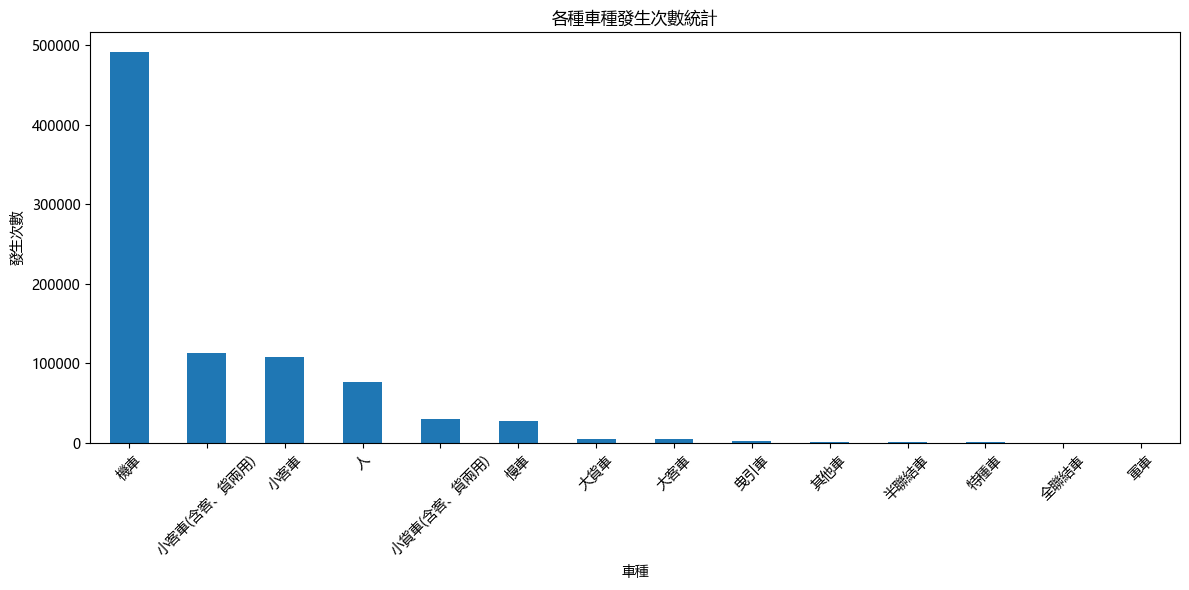

In [17]:
# 設置支援中文的字型（例如：SimHei 或 Microsoft YaHei）
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用 Microsoft YaHei字型
plt.rcParams['axes.unicode_minus'] = False   # 解決負號無法顯示的問題

# 繪製視覺化圖表
plt.figure(figsize=(12, 6))
vehicle_counts.plot(kind='bar')
plt.title("各種車種發生次數統計")
plt.xlabel("車種")
plt.ylabel("發生次數")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

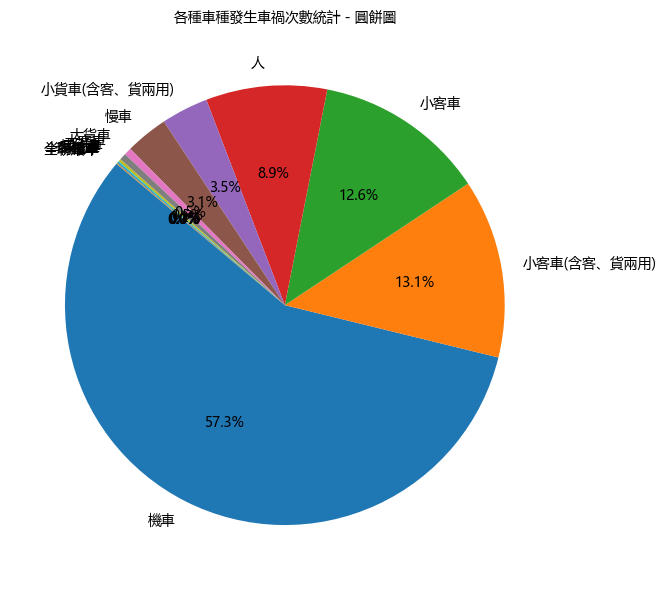

In [18]:
# 繪製圓餅圖
plt.figure(figsize=(10, 6))
plt.pie(
    vehicle_counts, 
    labels=vehicle_counts.index, 
    autopct='%1.1f%%', 
    startangle=140,
    textprops={'fontproperties': 'Microsoft YaHei'}
)
plt.title("各種車種發生車禍次數統計 - 圓餅圖", fontproperties='Microsoft YaHei')
plt.tight_layout()
plt.show()

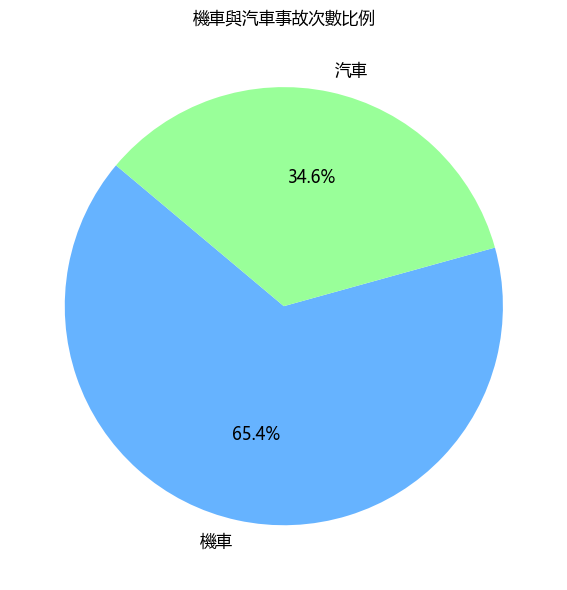

In [19]:
# 過濾數據：機車與汽車
motorcycle = vehicle_counts.loc[vehicle_counts.index == "機車"].sum()
car_categories = [
    "小客車","小客車(含客、貨兩用)", "小貨車(含客、貨兩用)", "大客車", "大貨車", "特種車"
]
cars = vehicle_counts.loc[vehicle_counts.index.isin(car_categories)].sum()

# 組合成新的統計數據
filtered_counts = pd.Series({
    "機車": motorcycle,
    "汽車": cars
})

# 繪製圓餅圖
plt.figure(figsize=(8, 6))
plt.pie(
    filtered_counts, 
    labels=filtered_counts.index, 
    autopct='%1.1f%%', 
    startangle=140,
    colors=["#66b3ff", "#99ff99"],  # 輔助視覺區分
    textprops={'fontsize': 12}
)
plt.title("機車與汽車事故次數比例")
plt.tight_layout()
plt.show()


交通部公路局 https://stat.thb.gov.tw/hb01/webMain.aspx?sys=100&funid=11200

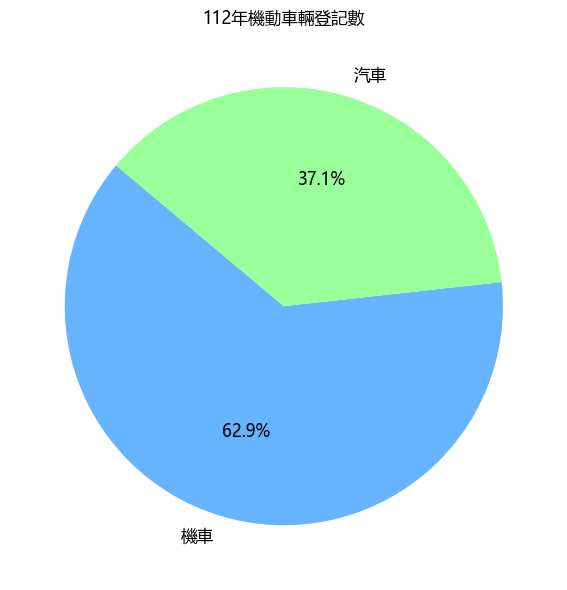

In [20]:
# 定義數據
labels = ["機車", "汽車"]
sizes = [14545338, 8590732]  # 機車數據, 汽車數據
colors = ["#66b3ff", "#99ff99"]  # 機車和汽車的顏色


# 繪製圓餅圖
plt.figure(figsize=(8, 6))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)
plt.title("112年機動車輛登記數")
plt.tight_layout()
plt.show()